In [1]:
import ldfi_py.pilp
import ldfi_py.psat
from parsing import ZipkinParser
import sys, re, os
from IPython.display import Image
from huawei_local import *


In [2]:
# put this into a library later, or borrow tuan's function

def get_label_3(data):
    svcarr = data[9].split(":")[1].split("-")
    svcarr.pop()
    return "-".join(svcarr)

def get_label_2(data):
    return data[9].split(":")[1]

def get_label_1(data):
    return data[9]

def get_label(data):
    return get_label_1(data)


# Parse the file and pick a bucket

In [3]:
trace_file = '1st_half_jan_26'
buckets = get_all_buckets(trace_file)
for key in buckets:
    print "KEY " + key + " -- " + str(len(buckets[key]))

#key = "http://127.0.0.1:8081/atswebsite/website"
key = "http://api-gateway:8080/product/product/buy/34211223411"

    

KEY http://127.0.0.1:8081/atswebsite/website -- 349
KEY http://10.154.72.17:30000/images/Huawei%20Air.png -- 1
KEY http://10.154.72.17:30000/js/acmeair-common.js -- 1
KEY http://api-gateway:8080/product/product/searchAll -- 2954
KEY http://api-gateway:8080/user/user/login -- 200
KEY http://localhost:8080/product/product/buy/34211223411 -- 1
KEY http://api-gateway:8080/product/product/buy/34211223411 -- 501


# use a rich label (service, instance, method)
# plot it

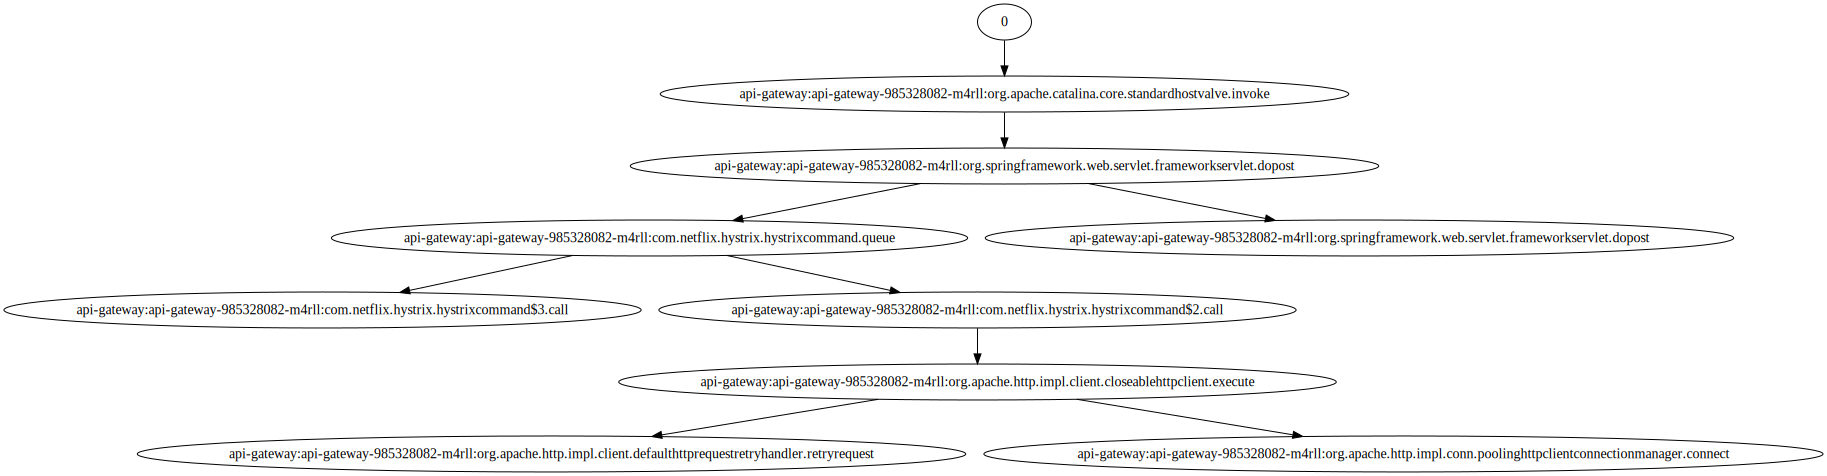

In [6]:
list(buckets[key])[1].to_dot(get_label_1)

I think the call graph above explains the apparent repetition in the graphs we looked at together on our last call.

However, as we discussed, this would appear to be an "uninteresting" graph in the sense that apigateway does not appear to be making any calls to any dependent services. or perhaps these services are not instrumented with tracing?

Let us use another graph as a running example.  #28 looks very rich:

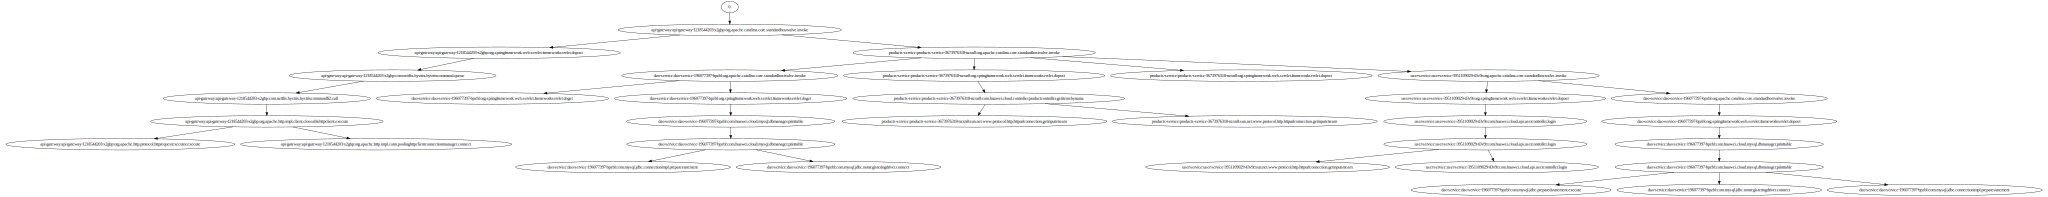

In [13]:
list(buckets[key])[28].to_dot(get_label_1)

# now solve for suggested faults

In [6]:
formula = get_formula(buckets[key], get_label_1)
cnf = CNFFormula(formula)
s = ldfi_py.pilp.Solver(cnf)
crs = s.solutions()
crs.next()

# use a less rich label (service, instance)

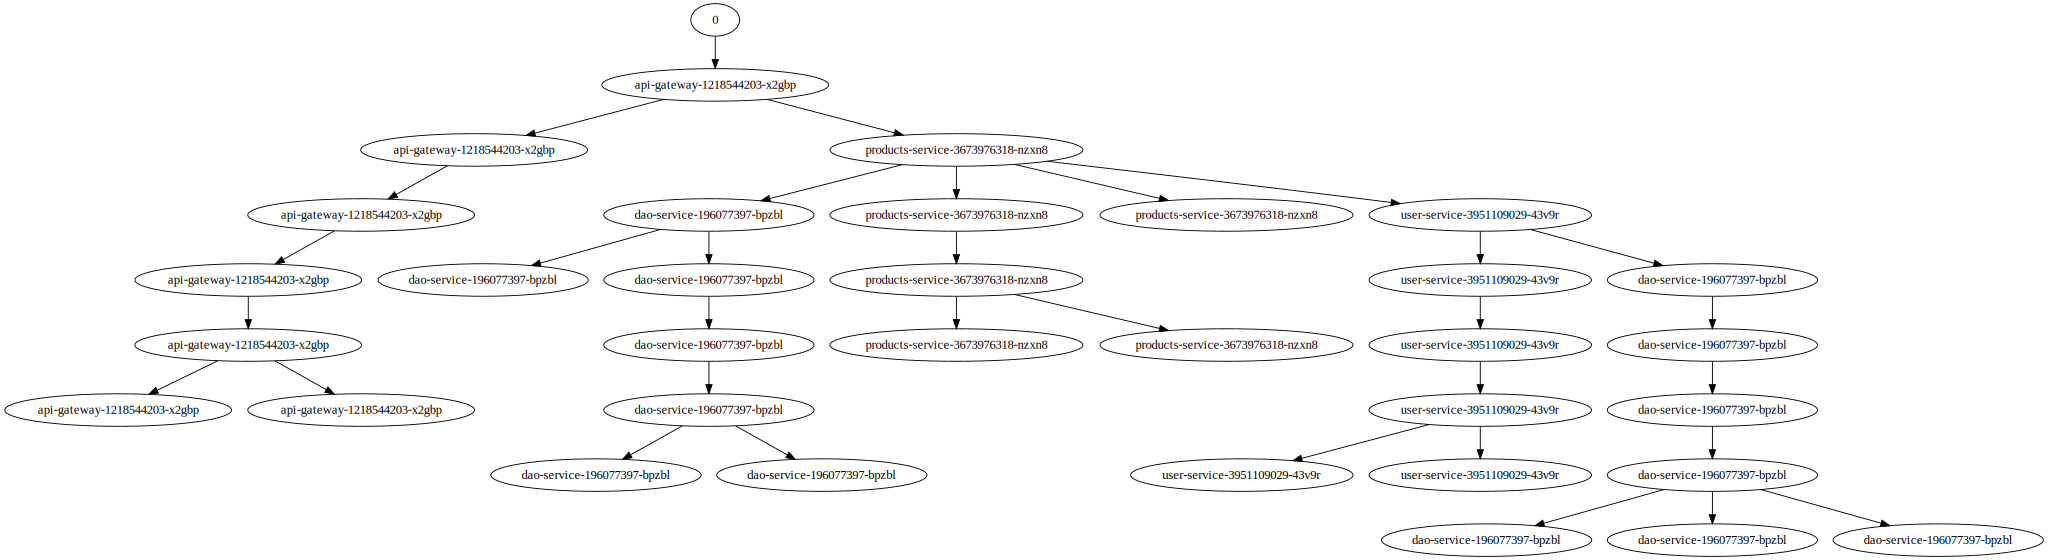

In [14]:
list(buckets[key])[28].to_dot(get_label_2)

In [16]:
formula = get_formula(buckets[key], get_label_2)
cnf = CNFFormula(formula)
s = ldfi_py.pilp.Solver(cnf)
crs = s.solutions()
crs.next()

[api_gateway_985328082_ph6p9,
 user_service_3951109029_43v9r,
 user_service_4169250386_h9flq,
 api_gateway_985328082_m4rll,
 user_service_3951109029_6cptx,
 user_service_3951109029_vz4xn,
 api_gateway_985328082_f2jc1]

In [ ]:
# truncate the instance id (service, truncated_instance_id)

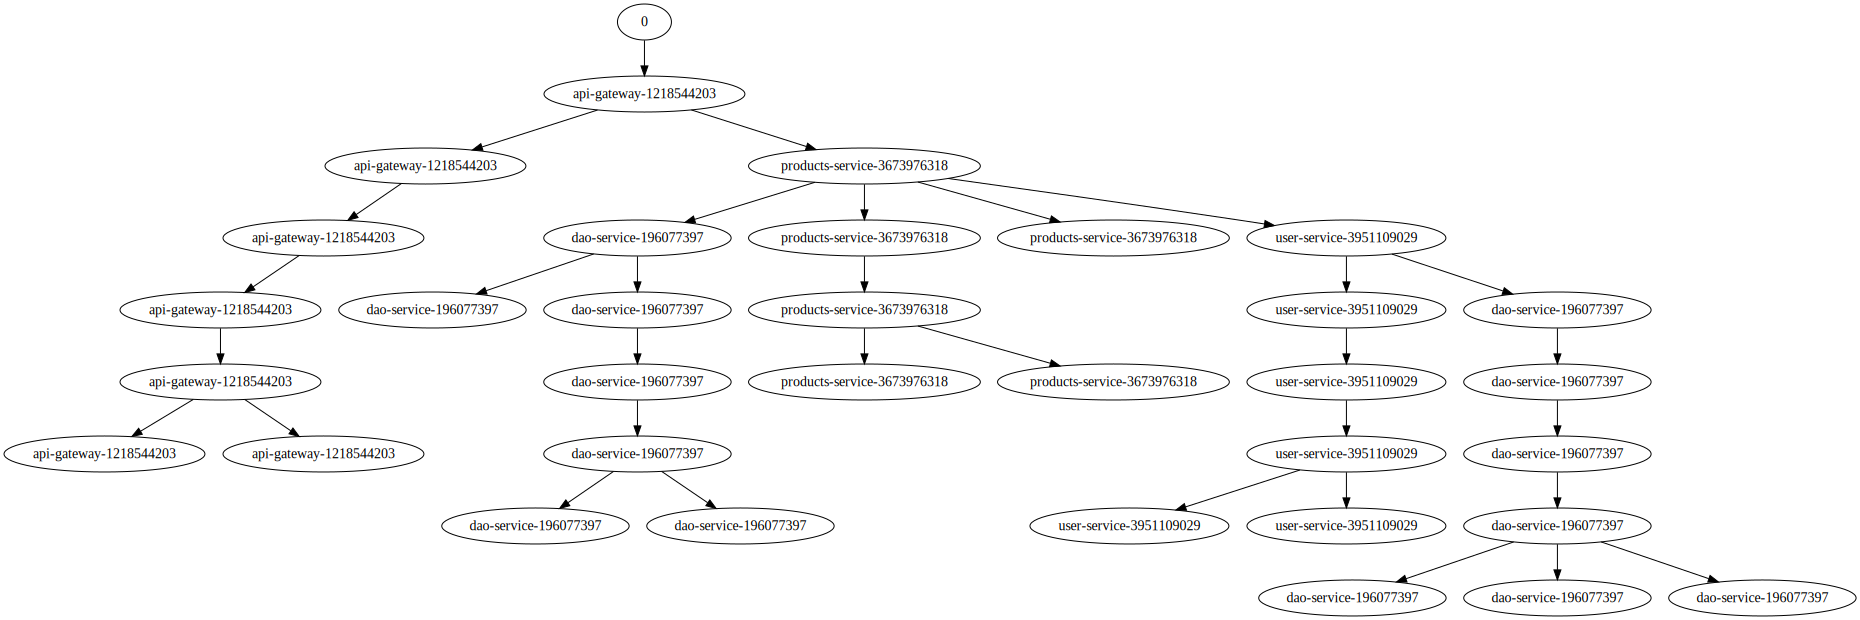

In [15]:
list(buckets[key])[28].to_dot(get_label_3)

In [18]:
formula = get_formula(buckets[key], get_label_3)
cnf = CNFFormula(formula)
s = ldfi_py.pilp.Solver(cnf)
crs = s.solutions()
crs.next()

[api_gateway_985328082, user_service_3951109029, user_service_4169250386]